## Work
1. 試比較有 BN 在 Batch_size = 2, 16, 32, 128, 256 下的差異
2. 請嘗試將 BN 放在 Activation 之前，並比較訓練結果
3. 請於 BN 放在 Input Layer 後，並比較結果

In [17]:
import os
# import keras
import itertools
# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [18]:
import tensorflow.keras as keras

In [19]:
# import tensorflow as tf
# print(tf.__version__)
# print(keras.__version__)
# print(tf.keras.__version__)

In [24]:
train, test = keras.datasets.cifar10.load_data()

In [25]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [26]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [31]:
import numpy as np

a = np.arange(50000)
np.random.shuffle(a)
indexs = a[:5000]

x_train = x_train[indexs]
y_train = y_train[indexs]

In [39]:
## 超參數設定
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = [2, 16, 32, 128, 256]
MOMENTUM = 0.95
# Dropout_EXP = [0.1, 0.25, 0.5]

In [27]:
from tensorflow.keras.layers import BatchNormalization

"""
建立神經網路，並加入 BN layer
"""
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128], batch_size=32):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
            x = BatchNormalization()(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            x = BatchNormalization()(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [33]:
results = {}
"""
使用迴圈，建立不同 Learning rate 的模型並訓練
"""
for batch_size in BATCH_SIZE:
    try:
        keras.backend.clear_session() # 把舊的 Graph 清掉
    except:
        pass
    print("Experiment with LR = %.6f" % (batch_size))
    model = build_mlp(input_shape=x_train.shape[1:],batch_size=batch_size)
    model.summary()
    optimizer = keras.optimizers.Adam(lr=LEARNING_RATE)
        
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)
    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=batch_size, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]
    
    exp_name_tag = "exp-batch_size-{batch_size}".format(batch_size=batch_size)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}


Experiment with LR = 2.000000
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization (BatchNo (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_1 (Batch (None, 256)               1024      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
batch_normalization_2 (Batch (N

5000/5000 [==============================] - 2s 498us/sample - loss: 0.8010 - accuracy: 0.7116 - val_loss: 2.7128 - val_accuracy: 0.3458
Epoch 42/50
5000/5000 [==============================] - 2s 499us/sample - loss: 0.7315 - accuracy: 0.7396 - val_loss: 2.6841 - val_accuracy: 0.3550
Epoch 43/50
5000/5000 [==============================] - 2s 499us/sample - loss: 0.7136 - accuracy: 0.7430 - val_loss: 2.5428 - val_accuracy: 0.3878
Epoch 44/50
5000/5000 [==============================] - 3s 500us/sample - loss: 0.6928 - accuracy: 0.7602 - val_loss: 2.6645 - val_accuracy: 0.3492
Epoch 45/50
5000/5000 [==============================] - 2s 500us/sample - loss: 0.6852 - accuracy: 0.7594 - val_loss: 2.7060 - val_accuracy: 0.3638
Epoch 46/50
5000/5000 [==============================] - 3s 502us/sample - loss: 0.6611 - accuracy: 0.7590 - val_loss: 2.7731 - val_accuracy: 0.3632
Epoch 47/50
5000/5000 [==============================] - 2s 497us/sample - loss: 0.6467 - accuracy: 0.7718 - val_loss:

5000/5000 [==============================] - 1s 218us/sample - loss: 0.5006 - accuracy: 0.8266 - val_loss: 2.7768 - val_accuracy: 0.3170
Epoch 32/50
5000/5000 [==============================] - 1s 193us/sample - loss: 0.4222 - accuracy: 0.8618 - val_loss: 2.9005 - val_accuracy: 0.3316
Epoch 33/50
5000/5000 [==============================] - 1s 233us/sample - loss: 0.5196 - accuracy: 0.8240 - val_loss: 4.7714 - val_accuracy: 0.2110
Epoch 34/50
5000/5000 [==============================] - 1s 205us/sample - loss: 0.4919 - accuracy: 0.8322 - val_loss: 3.1597 - val_accuracy: 0.3196
Epoch 35/50
5000/5000 [==============================] - 1s 196us/sample - loss: 0.4845 - accuracy: 0.8396 - val_loss: 3.1985 - val_accuracy: 0.3024
Epoch 36/50
5000/5000 [==============================] - 1s 176us/sample - loss: 0.4993 - accuracy: 0.8308 - val_loss: 4.0188 - val_accuracy: 0.2532
Epoch 37/50
5000/5000 [==============================] - 1s 181us/sample - loss: 0.4438 - accuracy: 0.8480 - val_loss:

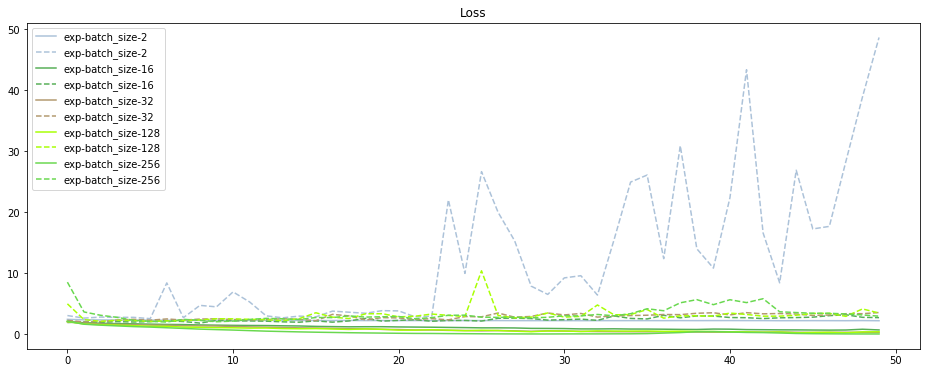

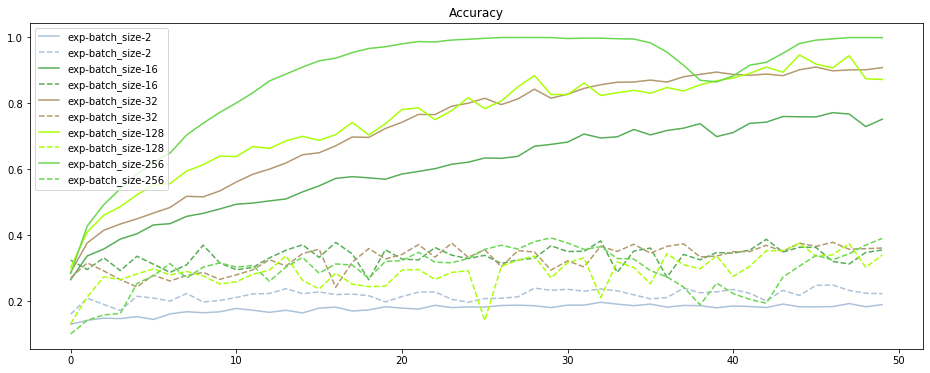

In [35]:
import matplotlib.pyplot as plt
%matplotlib inline

import matplotlib.colors as colors
color_bar = list(colors._colors_full_map.values())

plt.figure(figsize=(16,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(16,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

## 請嘗試將 BN 放在 Activation 之前，並比較訓練結果

In [36]:
from tensorflow.keras.layers import BatchNormalization

"""
建立神經網路，並加入 BN layer
"""
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128], batch_size=32):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = BatchNormalization()(input_layer)
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
            
        else:
            x = BatchNormalization()(x)
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [37]:
results = {}
"""
使用迴圈，建立不同 Learning rate 的模型並訓練
"""
for batch_size in [32]:
    try:
        keras.backend.clear_session() # 把舊的 Graph 清掉
    except:
        pass
    print("Experiment with LR = %.6f" % (batch_size))
    model = build_mlp(input_shape=x_train.shape[1:],batch_size=batch_size)
    model.summary()
    optimizer = keras.optimizers.Adam(lr=LEARNING_RATE)
        
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)
    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=batch_size, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]
    
    exp_name_tag = "exp-batch_size-{batch_size}".format(batch_size=batch_size)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}


Experiment with LR = 32.000000
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_2 (Batch (None, 256)               1024      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (

Epoch 47/50
5000/5000 [==============================] - 1s 298us/sample - loss: 0.2481 - accuracy: 0.9080 - val_loss: 3.9116 - val_accuracy: 0.3504
Epoch 48/50
5000/5000 [==============================] - 1s 297us/sample - loss: 0.2201 - accuracy: 0.9216 - val_loss: 3.9720 - val_accuracy: 0.3548
Epoch 49/50
5000/5000 [==============================] - 1s 299us/sample - loss: 0.2430 - accuracy: 0.9120 - val_loss: 4.1990 - val_accuracy: 0.3258
Epoch 50/50
5000/5000 [==============================] - 1s 297us/sample - loss: 0.2017 - accuracy: 0.9288 - val_loss: 3.7052 - val_accuracy: 0.3870


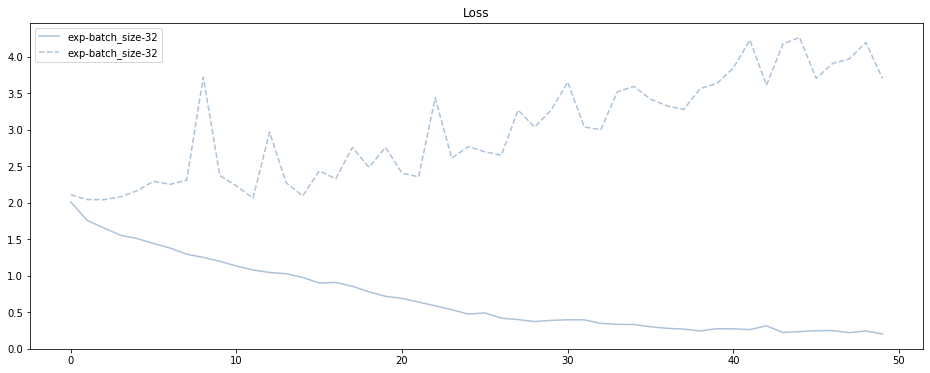

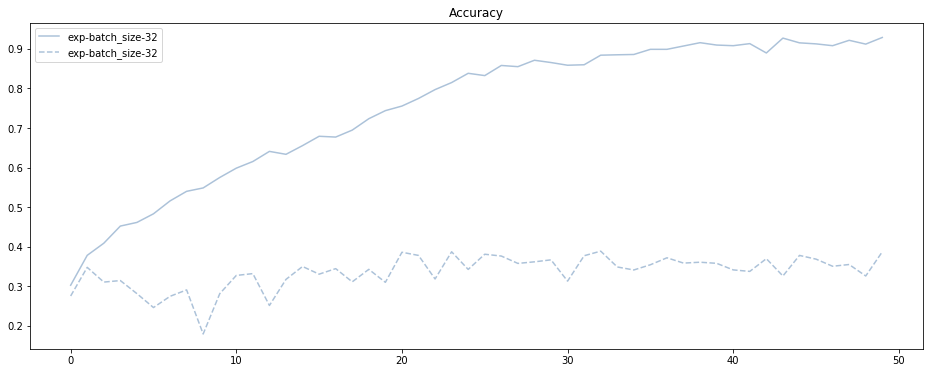

In [38]:
import matplotlib.pyplot as plt
%matplotlib inline

import matplotlib.colors as colors
color_bar = list(colors._colors_full_map.values())

plt.figure(figsize=(16,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(16,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()